In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# Opening dataset
cnn = pd.read_csv("C:/Users/Tommaso/Desktop/DatasetsKaggle/CNN_Articles/CNN_Articles_clean_2/CNN_Articels_clean.csv")
cnn.head(n = 5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [3]:
# Eliminating columns
# Url not valuable; description redundant of headline; second headlline redundant headline
cnn = cnn.drop(columns = ['Url', 'Description', 'Second headline'])
cnn.keys()

Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Headline',
       'Keywords', 'Article text'],
      dtype='object')

In [4]:
cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           37949 non-null  int64 
 1   Author          37949 non-null  object
 2   Date published  37949 non-null  object
 3   Category        37949 non-null  object
 4   Section         37949 non-null  object
 5   Headline        37949 non-null  object
 6   Keywords        37949 non-null  object
 7   Article text    37940 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.3+ MB


The dataset presents only 9 missing values in 'Article text'. Due to restricted amount of values, it is possible to drop them. All variables are presented as object, except for the index which is evaluated as integer. 

In [5]:
# Dropping missing values
cnn.dropna(inplace = True)

In [6]:
cnn.describe(include = 'object')

,Author,Date published,Category,Section,Headline,Keywords,Article text
count,37940,37940,37940,37940,37940,37940,37940
unique,11739,37939,9,55,37848,37854,37918
top,By,2016-02-17 14:08:53,news,europe,Must-watch videos of the week - CNN,"app-news-section, Must-watch videos of the wee...",\n
freq,3285,2,18069,10627,14,14,14


In order to understand the core business of CNN and its possible trends in 2022 (only series missing) the two variables highlighted are 'Category' and 'Section'. The categories correspond to the editorial board of CNN and indicate the broadcaster is divided in 9 major arguments for the news. Every category is divided into sub-categories, here named as sections. Those sections correspond to the micro arguments treated by CNN and are equal to 55.

In [7]:
# Presence of categories in percentage
round(cnn['Category'].value_counts(normalize = True) * 100).loc[lambda x : x>=1] # excluded categories = 0%

news             48.0
sport            41.0
politics          6.0
business          2.0
health            1.0
entertainment     1.0
Name: Category, dtype: float64

The core business of CNN is constituted from news, with circa 50% of the arguments treated. Then sport, which covers 40% of news given. All other categories are minor arguments for CNN, with 11% of news to be divided between the topics indicated.

In [8]:
# Presence of sections in percentage
round(cnn['Section'].value_counts(normalize = True) *100).loc[lambda x : x>=13] # limited to 13%, others between 0-6%

europe      28.0
sport       15.0
football    13.0
Name: Section, dtype: float64

In [9]:
# Isolating category "news": how much of each section?
cnn_news = cnn.loc[cnn['Category'] == 'news', 'Section']
round(cnn_news.value_counts(normalize = True) *100).loc[lambda x : x>=1] # excluded sections = 0%

europe        59.0
us            12.0
uk            10.0
opinions       5.0
world          3.0
australia      3.0
asia           2.0
americas       1.0
opinion        1.0
africa         1.0
middleeast     1.0
weather        1.0
china          1.0
living         1.0
Name: Section, dtype: float64

CNN appears to divide the news for countries and continents with a particular focus on foreign news than American. More than one quarter of the news covers European countries, followed by U.S. and U.K. The section of sport is covered for its majoritarian part as a general section, then comes football.

In [10]:
# Reformatting 'Date Published' in datetime
cnn['Date published'] = pd.to_datetime(cnn['Date published'], format = '%Y-%m-%d')

In [11]:
# Creating new column to strip time from date
cnn['Month'] = cnn['Date published'].dt.month
cnn['Year'] = cnn['Date published'].dt.year

In [12]:
# Creating new date uniting year and month (stripped before)
cnn['Date'] = cnn['Year'].astype(str) + '- ' + cnn['Month'].astype(str)
cnn.keys()

Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Headline',
       'Keywords', 'Article text', 'Month', 'Year', 'Date'],
      dtype='object')

In [13]:
# Converting Date in datetime format (default day = 1)
cnn['Date'] = pd.to_datetime(cnn['Date'])
cnn.head(n = 5)

,Index,Author,Date published,Category,Section,Headline,Keywords,Article text,Month,Year,Date
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...","world, There's a shortage of truckers, but TuS...","(CNN)Right now, there's a shortage of truck d...",7,2021,2021-07-01
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,"world, Bioservo's robotic 'Ironhand' could pro...",(CNN)Working in a factory or warehouse can me...,5,2021,2021-05-01
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"asia, This swarm of robots gets smarter the mo...","(CNN)In a Hong Kong warehouse, a swarm of aut...",6,2021,2021-06-01
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,"Two years later, remote work has changed milli...","success, Two years later, remote work has chan...",The pandemic thrust the working world into a n...,3,2022,2022-03-01
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,Why March is so volatile for stocks - CNN,"investing, Why March is so volatile for stocks...",New York (CNN Business)March Madness isn't jus...,3,2022,2022-03-01


In [14]:
# Verifying new column is in datetime format
cnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37940 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           37940 non-null  int64         
 1   Author          37940 non-null  object        
 2   Date published  37940 non-null  datetime64[ns]
 3   Category        37940 non-null  object        
 4   Section         37940 non-null  object        
 5   Headline        37940 non-null  object        
 6   Keywords        37940 non-null  object        
 7   Article text    37940 non-null  object        
 8   Month           37940 non-null  int64         
 9   Year            37940 non-null  int64         
 10  Date            37940 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 3.5+ MB


# How was the trend in news covering during years?

News constitute the core business of CNN. The objective is to isolate this category to see how much they were present during the years, tracing a monthly time series.
After having composed the time series it will be possible to forecast the amount of news that CNN will broadcast next and make predictions on some other trends for this broadcaster.

In [15]:
# Amount of news given every year
cnn['Year'].value_counts()

2021    5577
2019    4395
2020    4060
2018    3529
2022    3305
2016    3279
2012    2972
2017    2810
2015    2770
2013    2480
2014    1787
2011     976
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

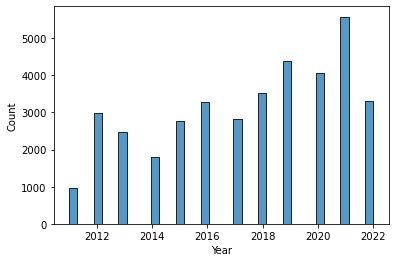

In [16]:
# Visualization previous yearly decomposition
sns.histplot(cnn['Year'], kde = False)

The trend from 2011 is composed from a three year ascending-and-peak process. The only exception is 2013, which has a lower number of news of 2012 even though it's higher than 2014.
Looking at this chart it is possible to speculate that 2022 will have more news broadcast than 2021

In [17]:
# Isolate 'Category' to analyze news
cnn_year = cnn.loc[:, ('Month', 'Year', 'Category')]
cnn_year = cnn_year.sort_values(by = ['Year'], ascending = True) # sort dataframe (from 2011 to 2022)
cnn_year

,Month,Year,Category
11299,12,2011,sport
11100,11,2011,sport
11101,11,2011,sport
11102,11,2011,sport
11103,11,2011,news
...,...,...,...
3843,1,2022,business
3844,1,2022,politics
3848,2,2022,business
3850,1,2022,business


In [18]:
# Dividing 'Category' in 0-1: if news = 1, others = 0 

for index, col in cnn_year.iterrows():
    
    if cnn_year.loc[index, 'Category'] == 'news':
        cnn_year.loc[index, 'Category'] = '1'
        
    elif cnn_year.loc[index, 'Category'] == 'business':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'health':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'entertainment':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'sport':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'politics':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'travel':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'vr':
        cnn_year.loc[index, 'Category'] = '0'
        
    elif cnn_year.loc[index, 'Category'] == 'style':
        cnn_year.loc[index, 'Category'] = '0'

In [19]:
# Dropping 0s (new version of dataframe with 18069 observations)
cnn_year = cnn_year.drop(cnn_year[cnn_year.Category == '0'].index)

In [20]:
# Sum news for every year
cnn_year = cnn_year.groupby(by = ['Year']).sum()
cnn_year

,Month
Year,
2011,4635
2012,7285
2013,7598
2014,6705
2015,8950
2016,9469
2017,8999
2018,12819
2019,13272


<AxesSubplot:xlabel='Year', ylabel='Month'>

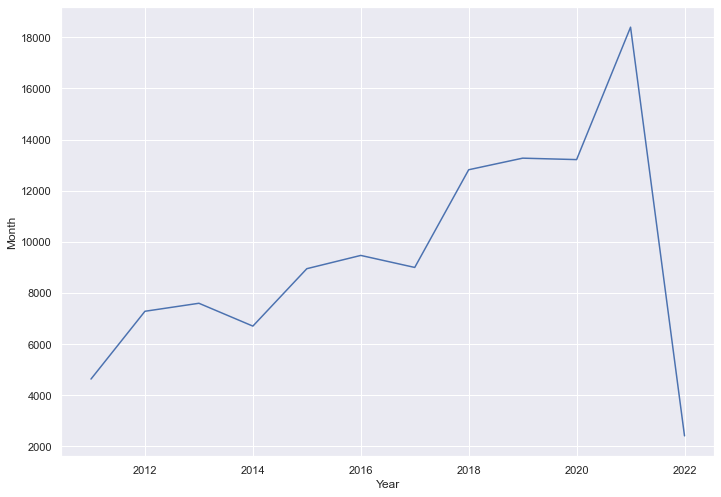

In [21]:
# Time series yearly news on CNN
sns.set(rc={'figure.figsize':(11.7,8.27)}) # setting bigger size of chart
sns.lineplot(data = cnn_year, x = 'Year', y = 'Month')

In [22]:
# Slicing dataframe for monthly analysis
cnn_month = cnn.loc[:, ('Date', 'Year', 'Month', 'Category')]

In [23]:
# Dividing 'Category' in 0-1
for index, col in cnn_month.iterrows():
    
    if cnn_month.loc[index, 'Category'] == 'news':
        cnn_month.loc[index, 'Category'] = '0'
        
    else:
        cnn_month.loc[index, 'Category'] = '1'

In [24]:
# Dropping all non news categories
cnn_month = cnn_month.drop(cnn_month[cnn_month.Category == '1'].index)

In [25]:
# Sorting dataframe for year
cnn_month = cnn_month.sort_values(by = ['Year'], ascending = True)

In [26]:
# Amount of news for every month
cnn_month = cnn_month.groupby(by = ['Year', 'Month']).size() 

In [27]:
# Series transformed to dataframe
cnn_month = pd.DataFrame(data = cnn_month)

In [28]:
# Dataframe brought to excel to be modified

#cnn_month.to_excel('CNN_Month.xlsx')

In [29]:
cnn_mon = pd.read_excel('C:/Users/Tommaso/Desktop/DatasetsKaggle/CNN_Articles/CNN_Month.xlsx', sheet_name = 1)

<AxesSubplot:xlabel='Year', ylabel='News_per_Month'>

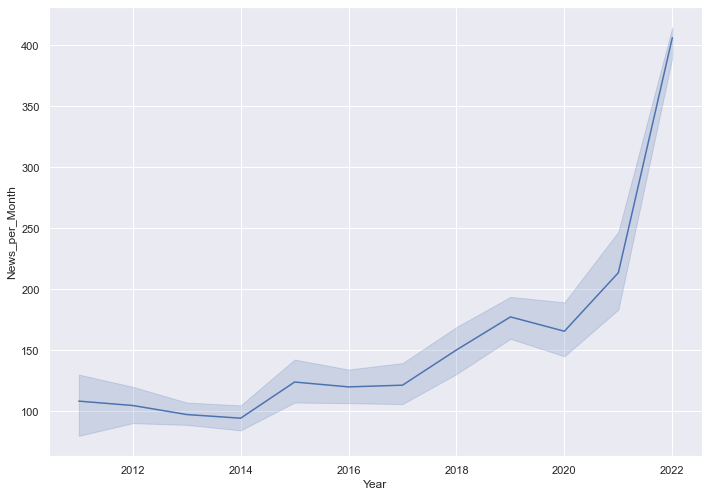

In [30]:
# News for every month
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = cnn_mon, x = 'Year', y = 'News_per_Month')

<AxesSubplot:xlabel='Year', ylabel='News_per_Month'>

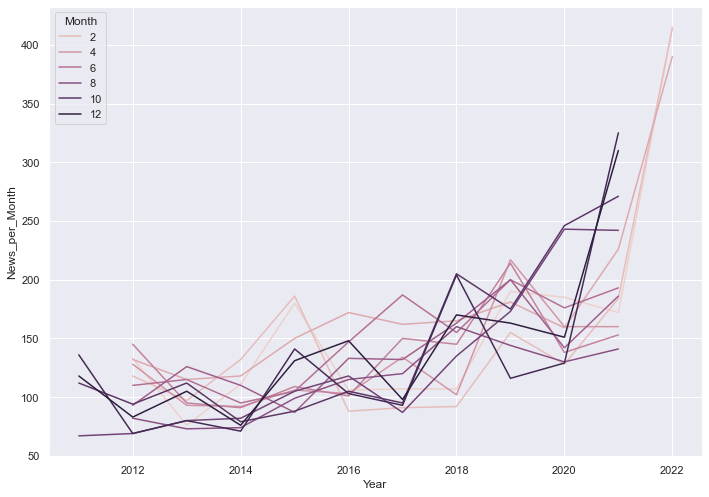

In [31]:
# Decomposition separating each month
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = cnn_mon, x = 'Year', y = 'News_per_Month', hue = 'Month')